In [1]:
# Dependencies and Setup 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Load a dataset from a CSV file
tortilla_prices_path = ("Resources/tortilla_prices.csv")

# Read The CSV File and Store onto a Pandas Dataframe
tortilla_df = pd.read_csv(tortilla_prices_path)

In [2]:
# Displaying first few rows of the DataFrame
tortilla_df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [3]:
# Displaying the Data Types of Each Column
print(tortilla_df.dtypes)

State                  object
City                   object
Year                    int64
Month                   int64
Day                     int64
Store type             object
Price per kilogram    float64
dtype: object


In [4]:
# Obtain a list of all Columns for reference
tortilla_df.columns

Index(['State', 'City', 'Year', 'Month', 'Day', 'Store type',
       'Price per kilogram'],
      dtype='object')

In [5]:
# Find Columns with Missing Data
tortilla_df.isnull().sum()


State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64

In [6]:
# Drop Rows with Missing Data
tortilla_df_no_nulls = tortilla_df.dropna(how='any')

In [7]:
# Copy the Data Frame
tortilla_df_clean = tortilla_df.copy()

In [8]:
# List of indices with zero prices
rows_with_zero_price = []

# Iterate over each row and its index
for index, row in tortilla_df_no_nulls.iterrows():
    # Check if the value in 'Price per kilogram' is zero
    if row['Price per kilogram'] == 0:
        # Add the index to the list of rows with zero prices
        rows_with_zero_price.append(index)

# Remove rows with zero values in 'Price per kilogram'
tortilla_df_clean = tortilla_df_no_nulls.drop(index=rows_with_zero_price)

# Print the cleaned DataFrame
print("Original DataFrame shape:", tortilla_df_no_nulls.shape)
print("Cleaned DataFrame shape:", tortilla_df_clean.shape)


Original DataFrame shape: (278004, 7)
Cleaned DataFrame shape: (278003, 7)


In [9]:
# Check Columns for Missing Data
print(tortilla_df_clean.isnull().sum())

State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64


In [10]:
# Change the Data Type of the 'Year' Column 
tortilla_df_clean["Year"] = tortilla_df_clean["Year"].astype(int).copy()

In [11]:
# Create a new 'Date' Column 
tortilla_df_clean["Date"] = tortilla_df_clean["Month"].astype(str).str.zfill(2) + "/" + tortilla_df_clean["Day"].astype(str).str.zfill(2) + "/" + tortilla_df["Year"].astype(str)

In [12]:
# Convert the data type of the 'Date' Column 
tortilla_df_clean["Date"]=pd.to_datetime(tortilla_df_clean["Date"])

In [13]:
# Filter out Rows where all values are not Equal to '0'
tortilla_df_filtered = tortilla_df_clean[(tortilla_df_clean != 0).all(axis=1)]

In [14]:
# Filter out Rows where 'Year' is 2024
tortilla_df_complete = tortilla_df_filtered[tortilla_df_filtered['Year'] != 2024].copy()

## Distribution of Prices

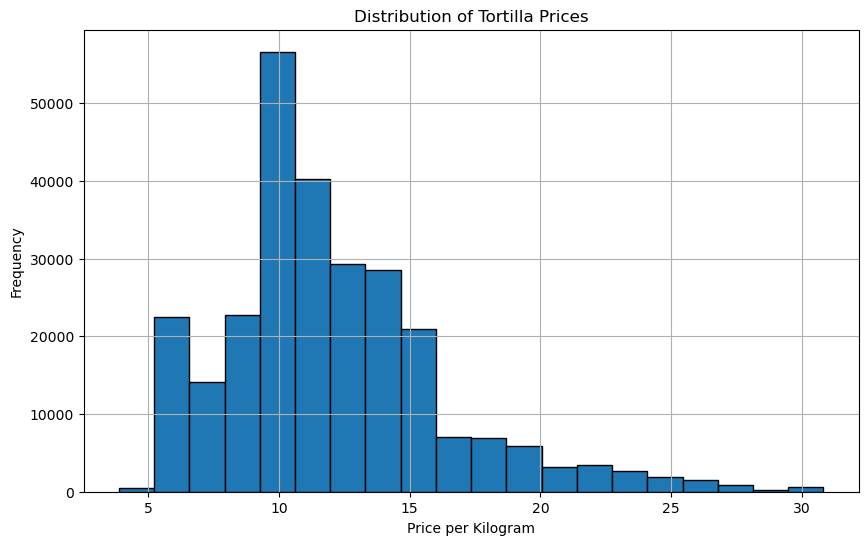

In [15]:
# Plot the Distribution of Prices 
plt.figure(figsize=(10, 6))
plt.hist(tortilla_df_complete['Price per kilogram'], bins=20, edgecolor='black')
plt.title('Distribution of Tortilla Prices')
plt.xlabel('Price per Kilogram')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Distribution of Prices by Store Type

Text(0, 0.5, 'Price per kilogram')

<Figure size 1000x600 with 0 Axes>

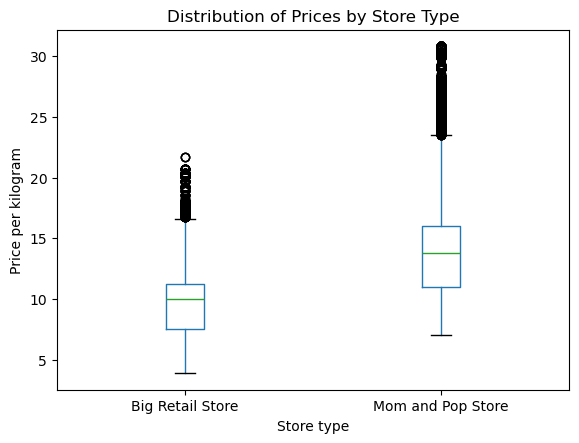

In [16]:
plt.figure(figsize=(10,6))
tortilla_df_complete.boxplot(column='Price per kilogram', by='Store type', grid=False)
plt.title('Distribution of Prices by Store Type')
plt.suptitle('')
plt.xlabel("Store type")
plt.ylabel('Price per kilogram')

## Distribution of Store Types in 2007

In [17]:
# Filter DataFrame for store types and year 2007
tortillas_2007_df = tortilla_df_complete[
    (tortilla_df_complete['Store type'].isin
     (['Mom and Pop Store', 'Big Retail Store'])) 
     & (tortilla_df_complete['Year'] == 2007)]

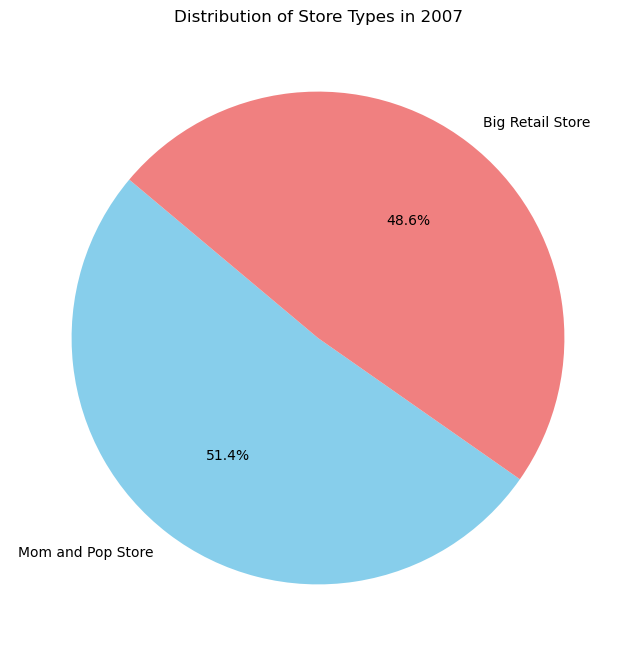

In [18]:
# Count the number of Store Types 
store_type_counts_2007 = tortillas_2007_df['Store type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
store_type_counts_2007.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'],startangle=140)
plt.title('Distribution of Store Types in 2007')
plt.ylabel('')  
plt.show()

## Distribution of Store Types in 2023

In [19]:
# Filter DataFrame for store types and year 2023
tortillas_2023_df = tortilla_df_complete[
    (tortilla_df_complete['Store type'].isin
     (['Mom and Pop Store', 'Big Retail Store'])) 
     & (tortilla_df_complete['Year'] == 2023)]

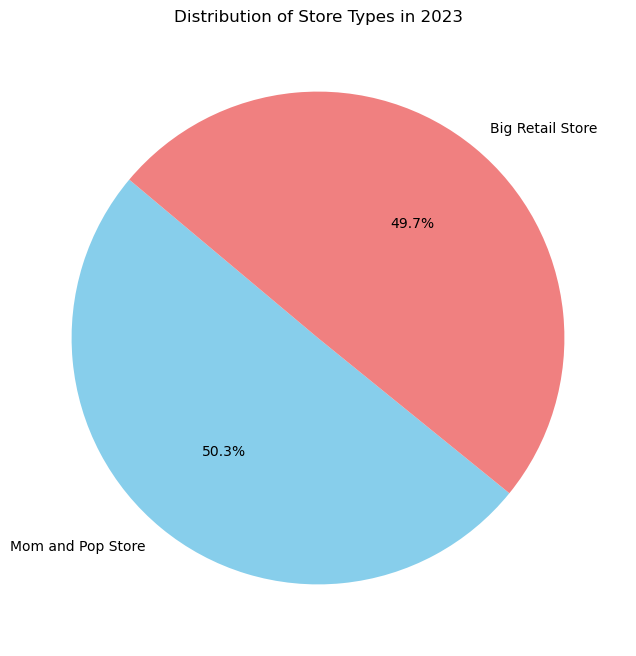

In [20]:
# Count the number of Store Types 
store_type_counts_2023 = tortilla_df_complete['Store type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
store_type_counts_2023.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'],startangle=140)
plt.title('Distribution of Store Types in 2023')
plt.ylabel('')  
plt.show()

## Price Comparison by State

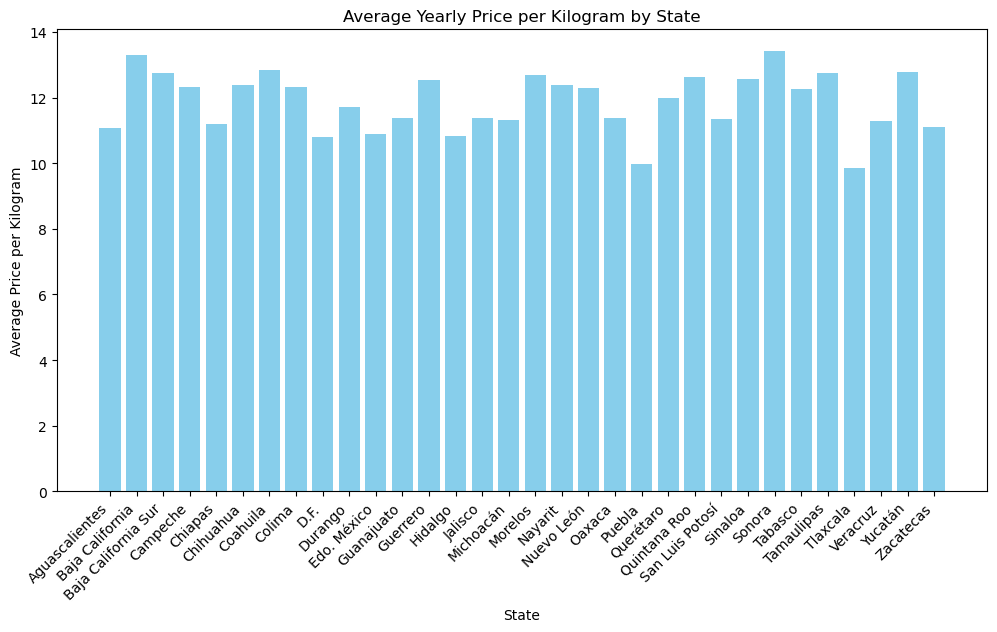

In [21]:
# Plot average price by state (Calculates the Average Price per Kilogram for each Store Type)
average_prices = tortilla_df_complete.groupby('State')['Price per kilogram'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_prices['State'], average_prices['Price per kilogram'], color='skyblue')
plt.title('Average Yearly Price per Kilogram by State')
plt.xlabel('State')
plt.ylabel('Average Price per Kilogram')
plt.xticks(rotation=45, ha='right')
plt.show()


## Price Comparison by Store Type

In [22]:
# Calculate the average price per kilogram for each store type
average_price_by_store = tortilla_df_complete.groupby('Store type')['Price per kilogram'].mean()

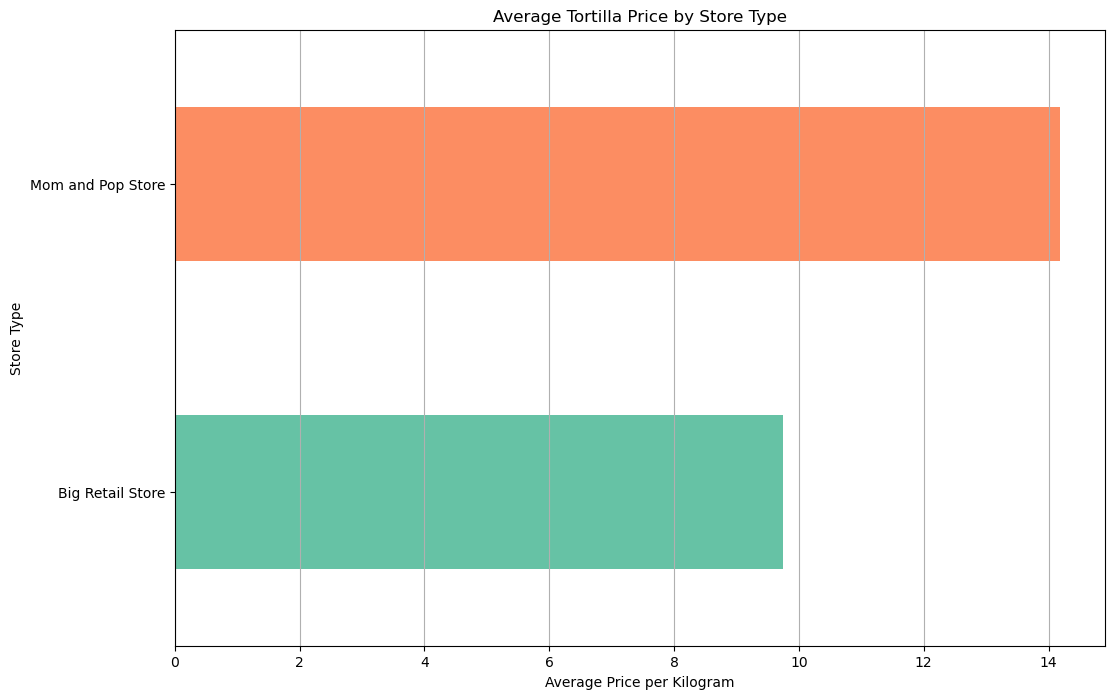

In [23]:
# Plot Average Torilla Price by Store Type (Average of All Available Data)
plt.figure(figsize=(12, 8))
average_price_by_store.sort_values().plot(kind='barh', color=plt.get_cmap('Set2').colors)
plt.title('Average Tortilla Price by Store Type')
plt.xlabel('Average Price per Kilogram')
plt.ylabel('Store Type')
plt.grid(True, axis='x')
plt.show()

## Increase of Tortilla Prices from 2007-2023



In [24]:
# Calculate the Yearly Average of Tortilla Prices 
yearly_avg = tortilla_df_complete.groupby('Year')['Price per kilogram'].mean().reset_index()

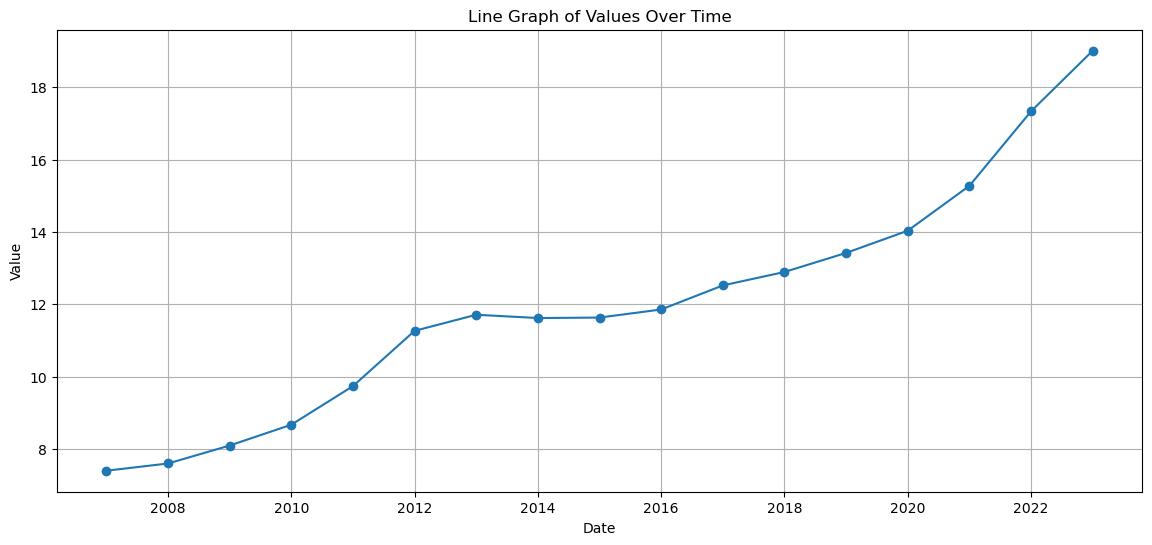

In [25]:
# Plot the data
plt.figure(figsize=(14, 6))
plt.plot(yearly_avg['Year'], yearly_avg['Price per kilogram'], marker='o')

# Add titles and labels
plt.title('Line Graph of Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.grid(True)
plt.show()

## Comparison of Average Tortilla Prices by State for Mom and Pop Stores (2007 vs 2023)

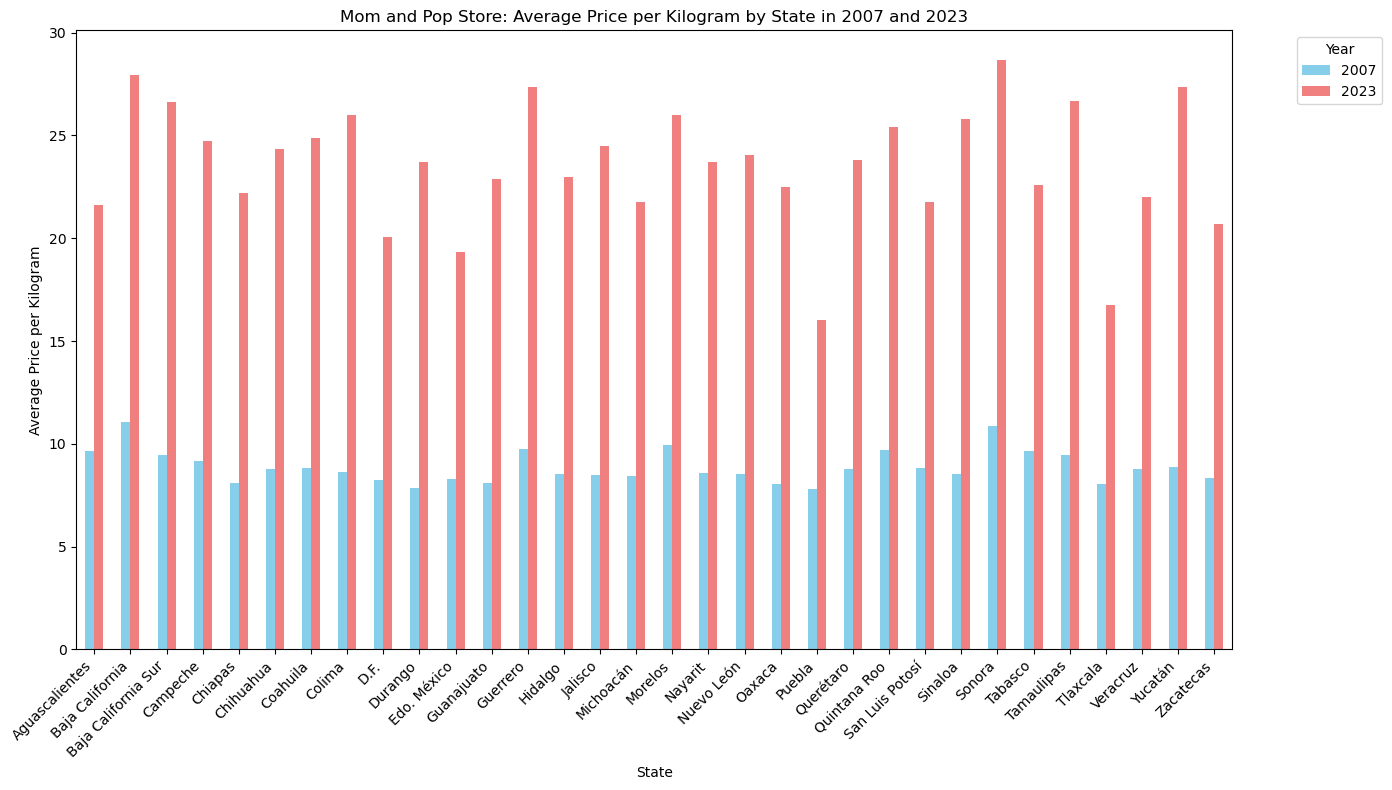

In [26]:
# Define selected years and store type
selected_years = [2007, 2023]
selected_stores = ['Mom and Pop Store']

# Filter the DataFrame for selected year and store type
filtered_df = tortilla_df_complete[
    tortilla_df_complete['Year'].isin(selected_years) & 
    tortilla_df_complete['Store type'].isin(selected_stores)]

# Select relevant columns 
selected_columns_df = filtered_df[['State', 'Price per kilogram', 'Store type']]

# Calculate the average price per kilogram by State and Year
average_prices = filtered_df.groupby(['State', 'Year'])['Price per kilogram'].mean().unstack()
average_prices.plot(kind='bar', figsize=(14, 8), color = ['skyblue', 'lightcoral'])

# Plot the data 
plt.title('Mom and Pop Store: Average Price per Kilogram by State in 2007 and 2023')
plt.xlabel('State')
plt.ylabel('Average Price per Kilogram')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Comparison of Average Tortilla Prices by State for Big Retail Stores (2007 vs 2023)

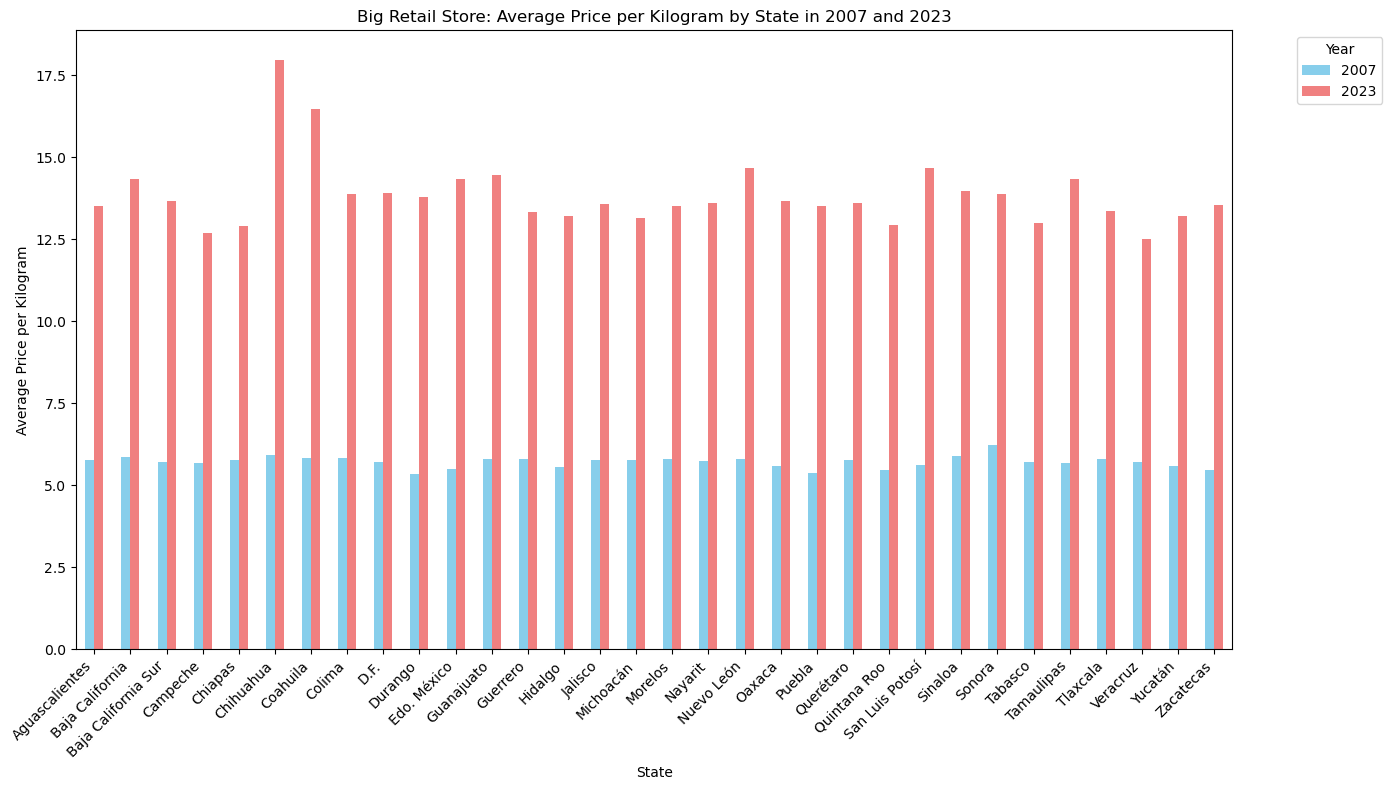

In [27]:
# Define selected years and store type
selected_years = [2007, 2023]
selected_stores = ['Big Retail Store']

# Filter the DataFrame for selected year and store type
filtered_df = tortilla_df_complete[
    tortilla_df_complete['Year'].isin(selected_years) & 
    tortilla_df_complete['Store type'].isin(selected_stores)]

# Select relevant columns 
selected_columns_df = filtered_df[['State', 'Price per kilogram', 'Store type']]

# Calculate the average price per kilogram by State and Year
average_prices = filtered_df.groupby(['State', 'Year'])['Price per kilogram'].mean().unstack()
average_prices.plot(kind='bar', figsize=(14, 8), color = ['skyblue', 'lightcoral'])

# Plot the data 
plt.title('Big Retail Store: Average Price per Kilogram by State in 2007 and 2023')
plt.xlabel('State')
plt.ylabel('Average Price per Kilogram')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()